In [321]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [322]:
import random
random.seed(42)

#Reading the dataset

In [264]:
df=pd.read_csv("ab_data.csv")
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [265]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   user_id       294478 non-null  int64 
 1   timestamp     294478 non-null  object
 2   group         294478 non-null  object
 3   landing_page  294478 non-null  object
 4   converted     294478 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


In [266]:
#finding the number of rows

In [267]:
total_users=float(df.shape[0])

In [268]:
total_users

294478.0

In [269]:
#finding the number of total unique users

In [270]:
df['user_id'].nunique()

290584

In [271]:
#finding the percentage of users converted

In [272]:
users_converted=float(df.query('converted == 1')['user_id'].nunique())
p1=(users_converted/total_users)
print("% of users converted is {0:.2%}".format(p1))

% of users converted is 11.94%


In [273]:
#checking for misaligned values

In [274]:
df.query('(group == "treatment" & landing_page != "new_page") or (group != "treatment" & landing_page == "new_page")')['user_id'].count()

3893

In [275]:
df.query('(group == "control" & landing_page != "old_page") or (group != "control" & landing_page == "old_page")')['user_id'].count()

3893

In [276]:
#checking for na values

In [277]:
df.isnull().values.any()

False

In [278]:
#dropping all misaligned values

In [279]:
df2=df.drop(df.query('(group == "treatment" and landing_page != "new_page") or (group != "treatment" and landing_page == "new_page") or (group == "control" and landing_page != "old_page") or (group != "control" and landing_page == "old_page")').index)

In [280]:
#checking if all misaligned values are removed

In [281]:
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

In [282]:
df2[((df2['group'] == 'control') == (df2['landing_page'] == 'old_page')) == False].shape[0]

0

In [283]:
df2['user_id'].nunique()

290584

In [284]:
df2[df2.duplicated(['user_id'], keep=False)]['user_id']

1899    773192
2893    773192
Name: user_id, dtype: int64

In [285]:
#extracting row information of duplicated user id

In [286]:
df2[df2['user_id']==773192]

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


In [287]:
df2=df2.query('not (user_id == 773192 and timestamp == "2017-01-09 05:37:58.781806")')

In [288]:
df2[df2['user_id']==773192]

,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


In [289]:
user_entries = df2[df2['user_id'] == 773192]

In [290]:
#probability of conversion irrespective of what page they're receiving

In [291]:
converted_users2=float(df2.query('converted == 1')['user_id'].nunique())
p2=converted_users2/float(df2.shape[0])
print("The probability of an individual converting regardless of the page they receive is {0:.2%}".format(p2))

The probability of an individual converting regardless of the page they receive is 11.96%


In [292]:
#probability of conversion of induviduals from the control group

In [293]:
cp=float(df2.query('group=="control" & converted==1')['user_id'].nunique())

In [294]:
cp2=cp/float(df2.query('group=="control"')['user_id'].nunique())

In [295]:
print(" Given that an individual was in the control group, the probability they converted is {0:.2%}".format(cp2))

 Given that an individual was in the control group, the probability they converted is 12.04%


In [296]:
#probability of conversion of induviduals from the treatment group

In [297]:
tp=float(df2.query('group=="treatment" & converted==1')['user_id'].nunique())

In [298]:
tp2=tp/float(df2.query('group=="treatment"')['user_id'].nunique())

In [299]:
print(" Given that an individual was in the treatment group, the probability they converted is {0:.2%}".format(tp2))

 Given that an individual was in the treatment group, the probability they converted is 11.88%


In [300]:
#probability that user received a new page

In [301]:
np=float(df2.query('landing_page=="new_page"')['user_id'].nunique())

In [302]:
np2=np/float(df2.shape[0])

In [303]:
print("The probability that an individual received the new page is {0:.2%}".format(np2))

The probability that an individual received the new page is 50.01%


In [304]:
#probability of conversion when an induvidual is lands on new page

In [305]:
npc=float(df2.query('landing_page=="new_page" & converted==1')['user_id'].nunique())

In [306]:
npc2=npc/float(df2.query('landing_page=="new_page"')['user_id'].nunique())

In [307]:
print(" Given that an individual was in new landing page, the probability they converted is {0:.2%}".format(npc2))

 Given that an individual was in new landing page, the probability they converted is 11.88%


The conversion rate regardless of landing page is 11.96%
The conversion rate of induviduals from control group is 12.04%
The conversion rate of induviduals from treatment group is 11.88%
The difference is conversion rates is almost negligable, therefore there is no significant observation that one group is better than the other.

#A_B testing:

1) Null Hypothesis:
    In null hypothesis, we assume that the new page is no better than the old page.
    In terms of conversion rates, assuming pnew is the conversion rate from new page and pold is the conversion rate of old page,
        pnew - pold <= 0

2) Alternate Hypothesis:
    In alternate hypothesis, we assume that the new page is better than the old page,
    In terms of rate of conversion, 
        pnew-pold < 0

Also we assume the type I error rate as 5 %

Assumption under null hypothesis is that the rate of conversion from new page and old page is the same as the rate of conversion regardles of page
    pnew = pold = pall
where, pall is the conversion rate of users regardless of what page they land.

In [308]:
#conversion rate of pnew under null as same as overall conversion rate regardless of landing page

In [309]:
p_new = round(float(df2.query('converted == 1')['user_id'].nunique())/float(df2['user_id'].nunique()),4)
p_new

0.1196

In [310]:
#overall rate of pold under null as same as overall conversion rate regardless of landing page

In [311]:
p_old = round(float(df2.query('converted == 1')['user_id'].nunique())/float(df2['user_id'].nunique()),4)
p_old

0.1196

In [312]:
#overall conversion rate regardless of landing page

In [313]:
#calculating the number of unique users who landed on new page

In [314]:
n_new=df2.query('landing_page=="new_page"')['user_id'].nunique()
n_new

145310

In [315]:
#calculating the number of unique users who landed on old page

In [316]:
n_old=df2.query('landing_page=="old_page"')['user_id'].nunique()
n_old

145274

In [317]:
#simulating n new transactins with conversion rate of pnew under the null and storing the data in new page converted

In [323]:
#Simulate  n_new  transactions with a convert rate of  p_new  under the null
new_page_converted = np.random.choice([0,1],n_new, p=(p_new,1-p_new))

new_page_converted 

array([1, 1, 1, ..., 1, 1, 1])

In [324]:
#simulating n old transactins with conversion rate of pold under the null and storing the data in old page converted

In [325]:
#Simulate  n_old  transactions with a convert rate of  p_old  under the null
old_page_converted = np.random.choice([0,1],n_old, p=(p_old,1-p_old))

old_page_converted 

array([1, 0, 1, ..., 1, 1, 1])

In [326]:
#finding pnew-pold of simulated values

In [327]:
new_page_converted.mean()

0.8821966829536853

In [328]:
old_page_converted.mean()

0.8811418423117695

In [329]:
#Find  pnew  -  pold for your simulated values 
new_page_converted.mean() - old_page_converted.mean()

0.0010548406419157441

In [330]:
#simulating 10000 pnew - pold and storing the values in p_diffs

In [331]:
#Import timeit package
import timeit
start = timeit.default_timer()

# Create sampling distribution for difference in completion rates
# with boostrapping
p_diffs = []
size = df.shape[0]
for _ in range(10000):
    samp = df2.sample(size, replace = True)
    new_page_converted = np.random.choice([0,1],n_new, p=(p_new,1-p_new))
    old_page_converted = np.random.choice([0,1],n_old, p=(p_old,1-p_old))
    p_diffs.append(new_page_converted.mean() - old_page_converted.mean())
    
#Compute python running time.
stop = timeit.default_timer()
print(stop - start)

313.6023642000073


In [332]:
p_diffs = np.array(p_diffs)

(array([1.000e+00, 2.700e+01, 1.880e+02, 8.950e+02, 2.360e+03, 3.096e+03,
        2.361e+03, 8.840e+02, 1.640e+02, 2.400e+01]),
 array([-0.00536629, -0.00438897, -0.00341165, -0.00243434, -0.00145702,
        -0.0004797 ,  0.00049762,  0.00147493,  0.00245225,  0.00342957,
         0.00440688]),
 <BarContainer object of 10 artists>)

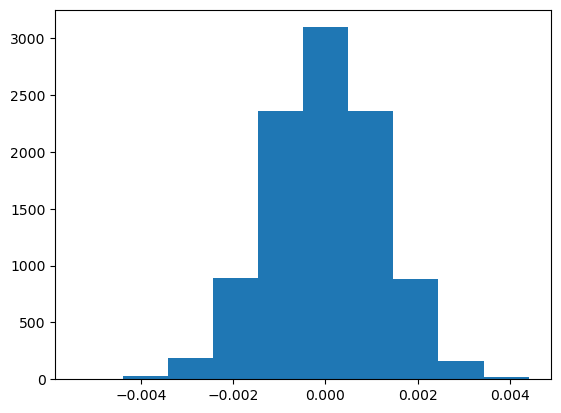

In [333]:
plt.hist(p_diffs)

In [334]:
#creating number of users with all new_page users and all new_page users
convert_new = df2.query('converted == 1 and landing_page == "new_page"')['user_id'].nunique()
convert_old = df2.query('converted == 1 and landing_page == "old_page"')['user_id'].nunique()

In [335]:
convert_new, convert_old

(17264, 17489)

In [336]:
#computing actual converted rate
actual_cvt_new = float(convert_new)/ float(n_new) 
actual_cvt_old = float(convert_old)/ float(n_old)

In [337]:
actual_cvt_new, actual_cvt_old

(0.11880806551510564, 0.1203863045004612)

In [338]:
#computing observed difference in converted rate 
obs_diff = actual_cvt_new - actual_cvt_old
obs_diff

-0.0015782389853555567

In [339]:
#creating distribution under the null hypothesis

In [340]:
null_vals = np.random.normal(0, p_diffs.std(), p_diffs.size)

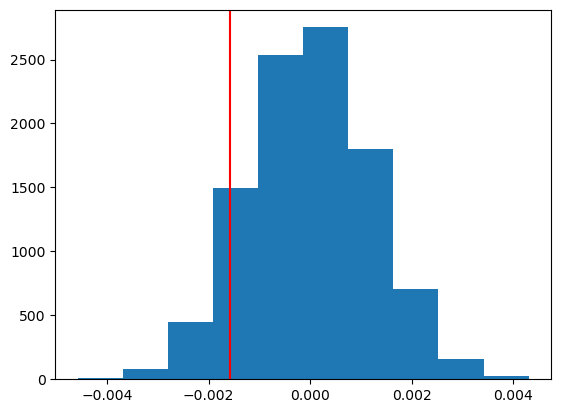

In [341]:
#Plot Null distribution
plt.hist(null_vals)
#Plot vertical line for observed statistic
plt.axvline(x=obs_diff,color ='red')

In [342]:
#computinng proportion of the p_diffs are greater than the actual difference observed in ab_data.csv
(null_vals > obs_diff).mean()

0.9049

The resultant value is greater than 0.05. Therefore we fail to reject null hypothesis. 
And the old page has higher probability of conversion than new page.

Using built in libraries

In [343]:
#regression model library 
import statsmodels.api as sm

In [344]:
convert_old, convert_new ,n_old ,n_new

(17489, 17264, 145274, 145310)

In [345]:
#using stats.proportions_ztest to compute your test statistic and p-value

In [346]:
z_score, p_value = sm.stats.proportions_ztest(np.array([convert_new,convert_old]),np.array([n_new,n_old]), alternative = 'larger')

In [347]:
z_score, p_value

(-1.3109241984234394, 0.9050583127590245)

In [348]:
from scipy.stats import norm
norm.cdf(z_score)

0.09494168724097551

In [349]:
#critical value at 95% confidence
norm.ppf(1-(0.05/2))

1.959963984540054

Since the z score of 1.3109 does not exceed critical value of 1.9599 at 95% confidence, we fail to reject the null hypothesis that new page users has a better or equal converted rate than old page users. Therefore, the converted rate for new page and old page have no difference. This result is the same as the statistical observation.

Logistic Regression

In [354]:
# Create a column for the intercept
df2['intercept'] = 1

# Create dummy variable columns for the landing page
df2 = df2.join(pd.get_dummies(df2['landing_page']))

# Create a dummy variable for the treatment group
df2['ab_page'] = pd.get_dummies(df2['group'])['treatment']

# Display the first few rows of the DataFrame
df2.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page,new_page,old_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,False,False,True
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,False,False,True
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,True,True,False
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,True,True,False
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,False,False,True


In [360]:
df2['ab_page'] = df2['ab_page'].astype(int)
df2['old_page'] = df2['old_page'].astype(int)
df2['new_page'] = df2['new_page'].astype(int)

In [361]:
df2

,user_id,timestamp,group,landing_page,converted,intercept,ab_page,new_page,old_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,0,1
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0,0,1
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,1,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,1,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...
294473,751197,2017-01-03 22:28:38.630509,control,old_page,0,1,0,0,1
294474,945152,2017-01-12 00:51:57.078372,control,old_page,0,1,0,0,1
294475,734608,2017-01-22 11:45:03.439544,control,old_page,0,1,0,0,1
294476,697314,2017-01-15 01:20:28.957438,control,old_page,0,1,0,0,1


In [363]:
#creating Logit regression model for conveted variable and  ab_page, and us control as baseline
log = sm.Logit(df2['converted'], df2[['intercept','ab_page']])

In [364]:
#fitting the model
result = log.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


In [366]:
print(result.summary())

                           Logit Regression Results                           
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Sun, 22 Sep 2024   Pseudo R-squ.:               8.077e-06
Time:                        14:49:11   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1899
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0150      0.011     -1.311      0.190      -0.037       0.007


Null Hypothesis : There is no difference in conversion rates between users who see the new page and those who see the old page.
Alternative hypothesis : Users who see the new page have a different conversion rate compared to those who see the old page.
The 95% confidence interval for the ab_page coefficient is [-0.037, 0.007]. The interval includes 0.
The results indicate that there is no strong evidence to suggest that the new landing page significantly affects conversion rates compared to the old landing page. The p-value and confidence intervals suggest that any observed effect could be due to random variation rather than a true effect.

The p-value associated with ab_page is 0.190. There we fail to reject null hypothesis

In [367]:
#adding new variable - countries to check if it affects the rate of conversion

In [369]:
c=pd.read_csv('countries.csv')
c.head()

,user_id,country
0,834778,UK
1,928468,US
2,822059,UK
3,711597,UK
4,710616,UK


In [370]:
df3 = df2.merge(c, on ='user_id', how='left')
df3.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page,new_page,old_page,country
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,0,1,US
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0,0,1,US
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,1,0,US
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,1,0,US
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0,0,1,US


In [371]:
c['country'].unique()

array(['UK', 'US', 'CA'], dtype=object)

In [376]:
# Create dummy variables for the 'country' column
df3[['CA', 'UK', 'US']] = pd.get_dummies(df3['country'])

# Drop the Canada column
df3 = df3.drop(columns=['CA'])

In [377]:
df3

,user_id,timestamp,group,landing_page,converted,intercept,ab_page,new_page,old_page,country,UK,US
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,0,1,US,False,True
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0,0,1,US,False,True
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,1,0,US,False,True
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,1,0,US,False,True
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0,0,1,US,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...
290579,751197,2017-01-03 22:28:38.630509,control,old_page,0,1,0,0,1,US,False,True
290580,945152,2017-01-12 00:51:57.078372,control,old_page,0,1,0,0,1,US,False,True
290581,734608,2017-01-22 11:45:03.439544,control,old_page,0,1,0,0,1,US,False,True
290582,697314,2017-01-15 01:20:28.957438,control,old_page,0,1,0,0,1,US,False,True


In [379]:
df3['UK'] = df3['UK'].astype(int)
df3['US'] = df3['US'].astype(int)

In [385]:
#creatingintercept variable
df3['intercept'] = 1

#creating Logit regression model for conveted and country, and us CA and old page as baseline
logit3 = sm.Logit(df3['converted'], df3[['intercept','new_page','UK','US']])
result = logit3.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290580
Method:                           MLE   Df Model:                            3
Date:                Sun, 22 Sep 2024   Pseudo R-squ.:               2.323e-05
Time:                        15:39:21   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1760
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -2.0300      0.027    -76.249      0.000      -2.082      -1.978
new_page      -0.0149      0.011     -1.307      0.191      -0.037       0.007
UK             0.0506      0.028      1.784      0.074      -0.005       0.106
US             0.0408      0.027      1.516      0.130      -0.012       0.093
==============================================================================
"""

In [382]:
1/np.exp(-0.0149),np.exp(0.0506),np.exp(0.0408)

(1.0150115583846535, 1.0519020483004984, 1.0416437559600236)

new_page: The odds of conversion for users on the new page are about 1.50% higher than for users on the old page
UK: The odds of conversion for users in the UK are approximately 5.19% higher than for users in the control group
US: The odds of conversion for users in the US are about 4.16% higher than for users in the control group

In [386]:
#creating a new intereacton variable between new page and country US and UK
df3['UK_new_page'] = df3['new_page']* df3['UK']
df3['US_new_page'] = df3['new_page']* df3['US']

In [387]:
#creatinglogistic regression for the intereaction variable between new page and country using dummy variable
logit4 = sm.Logit(df3['converted'], df3[['intercept','new_page','UK_new_page','US_new_page','UK','US']])
result4 = logit4.fit()
result4.summary()

Optimization terminated successfully.
         Current function value: 0.366109
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290578
Method:                           MLE   Df Model:                            5
Date:                Sun, 22 Sep 2024   Pseudo R-squ.:               3.482e-05
Time:                        15:39:26   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1920
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
intercept      -2.0040      0.036    -55.008      0.000      -2.075      -1.933
new_page       -0.0674      0.052     -1.297      0.195      -0.169       0.034
UK_new_page     0.0783      0.057      1.378      0.168      -0.033       0.190
US_new_page     0.0469      0.054      0.872      0.383      -0.059       0.152
UK              0.0118      0.040      0.296      0.767      -0.066       0.090
US              0.0175      0.038      0.465      0.642      -0.056       0.091
===============================================================================
"""

In [388]:
#exponentiated the CV to inteprete the result
np.exp(result4.params)

intercept      0.134794
new_page       0.934776
UK_new_page    1.081428
US_new_page    1.048001
UK             1.011854
US             1.017682
dtype: float64

All values except the intercept value are greater than 0.05 and there is statistically insignificant. The values of UK and US are different than that of the coeffecient of the new page. 
Therefore, the country a user lives is consideren not significant on the conversion rate in regards with the page the user lands in.

UK_new_page: 1.081428 - The odds of conversion for users in the UK on the new page are about 8.14% higher than for users in the control group.
US_new_page: 1.048001 - The odds of conversion for users in the US on the new page are approximately 4.80% higher than for users in the control group.
UK: 1.011854 - The odds of conversion for users in the UK, regardless of page type, are about 1.19% higher than for users in the control group.
US: 1.017682 - The odds of conversion for users in the US, regardless of page type, are approximately 1.77% higher than for users in the control group.

In [392]:
#sklearn
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score
from sklearn.model_selection import train_test_split

In [393]:
#defining variables
x = df3[['new_page','UK_new_page','US_new_page','UK','US']]
y = df3['converted']
        
#spliting into test and train data
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=0)

In [394]:
linear = LinearRegression()

In [395]:
linear.fit(X_train,y_train) # fit the train data

LinearRegression()

In [396]:
print(linear.score(X_test,y_test))

-2.1399318295811653e-05


the result is very low, therefore country data is not advisable to predict conversion rate.